In [1]:

%pprint
import sys
if (osp.join('..', 'py') not in sys.path): sys.path.insert(1, osp.join('..', 'py'))

Pretty printing has been turned OFF


In [2]:

from FRVRS import (nu, fu, DataFrame, np, display)
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:

frame_dict = nu.load_data_frames(frvrs_logs_df='frvrs_logs_df', tag_to_salt_df='tag_to_salt_df')

Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/frvrs_logs_df.pkl.
Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from '/home/dbabbitt/anaconda3/envs/itm_analysis_reporting/lib/python3.7/site-packages/pandas/_libs/internals.cpython-37m-x86_64-linux-gnu.so'>
No pickle exists for frvrs_logs_df - attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/csv/frvrs_logs_df.csv.
Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/tag_to_salt_df.pkl.



# Triage Accuracy

(How many patients did they get right and do they do it in the right order, for example: still or obvious life threat first (Red, Gray, Black), then wavers, then walkers last.)


<img src="http://localhost:8889/files/itm-analysis-reporting/saves/png/salt_mass_casualty_triage.png" />


### Correct Count by Tag

In [21]:

tag_to_salt_df = frame_dict['tag_to_salt_df']
print(list(tag_to_salt_df.columns))
tag_to_salt_df.predicted_tag.unique()

['session_uuid', 'scene_id', 'patient_id', 'is_scene_aborted', 'scene_type', 'is_a_one_triage_file', 'patient_count', 'last_tag', 'max_salt', 'predicted_tag', 'is_tag_correct']


['black', 'gray', 'red', 'yellow', 'green', NaN]
Categories (6, object): ['black' < 'gray' < 'red' < 'yellow' < 'green' < 'Not Tagged']

In [ ]:

# Get the percentage tag correct counts for each scene for each group
correct_count_by_tag_df = fu.get_percentage_tag_correct_dataframe(tag_to_salt_df, groupby_column='predicted_tag')

In [24]:

base_mask_series = (correct_count_by_tag_df.scene_type == 'Triage') & (correct_count_by_tag_df.is_scene_aborted == False)
base_mask_series &= (correct_count_by_tag_df.is_a_one_triage_file == True)
mask_series = base_mask_series & correct_count_by_tag_df.predicted_tag.isin(fu.tag_color_order[:-1])
df = correct_count_by_tag_df[mask_series]
# total_count = df.total_count.sum()
# correct_count = df.correct_count.sum()
df = nu.get_statistics(df, ['percentage_tag_correct'])
tagged_percent = int(df.loc['mean', 'percentage_tag_correct'])
standard_deviation = int(df.loc['SD', 'percentage_tag_correct'])
print(f'Participants accurately tagged {tagged_percent}% of patients (SD = {standard_deviation})')

Participants accurately tagged 79% of patients (SD = 33)


In [7]:

mask_series = correct_count_by_tag_df.predicted_tag.isnull()
df = correct_count_by_tag_df[mask_series]
print(df.shape)
display(df.sample(min(5, df.shape[0])).dropna(axis='columns', how='all').T)

(0, 9)


Empty DataFrame
Columns: []
Index: []

mean   mode  median     SD  min    25%    50%  \
correct_green_tag_count        1.70    1.0     2.0   0.97  0.0   1.00    2.0   
total_green_tag_count          2.15    3.0     2.0   1.03  1.0   1.00    2.0   
percentage_green_tag_correct  80.93  100.0   100.0  30.68  0.0  66.67  100.0   

                                75%    max  
correct_green_tag_count         3.0    4.0  
total_green_tag_count           3.0    4.0  
percentage_green_tag_correct  100.0  100.0

mean   mode  median     SD  min    25%    50%  \
correct_black_tag_count        0.97    1.0     1.0   0.17  0.0    1.0    1.0   
total_black_tag_count          1.00    1.0     1.0   0.00  1.0    1.0    1.0   
percentage_black_tag_correct  97.09  100.0   100.0  16.83  0.0  100.0  100.0   

                                75%    max  
correct_black_tag_count         1.0    1.0  
total_black_tag_count           1.0    1.0  
percentage_black_tag_correct  100.0  100.0

mean   mode  median     SD  min  25%    50%  \
correct_gray_tag_count        0.70    1.0     1.0   0.46  0.0  0.0    1.0   
total_gray_tag_count          1.00    1.0     1.0   0.00  1.0  1.0    1.0   
percentage_gray_tag_correct  70.21  100.0   100.0  45.80  0.0  0.0  100.0   

                               75%    max  
correct_gray_tag_count         1.0    1.0  
total_gray_tag_count           1.0    1.0  
percentage_gray_tag_correct  100.0  100.0

mean   mode  median     SD  min   25%    50%  \
correct_red_tag_count        2.61    2.0     2.0   1.13  0.0   2.0    2.0   
total_red_tag_count          3.21    4.0     4.0   1.15  1.0   2.0    4.0   
percentage_red_tag_correct  83.45  100.0   100.0  24.53  0.0  75.0  100.0   

                              75%    max  
correct_red_tag_count         4.0    6.0  
total_red_tag_count           4.0    9.0  
percentage_red_tag_correct  100.0  100.0

mean   mode  median     SD  min   25%    50%  \
correct_yellow_tag_count        1.25    1.0     1.0   0.69  0.0   1.0    1.0   
total_yellow_tag_count          1.61    2.0     2.0   0.61  1.0   1.0    2.0   
percentage_yellow_tag_correct  78.85  100.0   100.0  35.36  0.0  50.0  100.0   

                                 75%    max  
correct_yellow_tag_count         2.0    3.0  
total_yellow_tag_count           2.0    3.0  
percentage_yellow_tag_correct  100.0  100.0

mean  mode  median    SD  min  25%  50%  \
correct_not_tagged_tag_count       0.00   0.0     0.0  0.00  0.0  0.0  0.0   
total_not_tagged_tag_count         7.43   8.0     8.0  3.28  1.0  8.0  8.0   
percentage_not_tagged_tag_correct  0.00   0.0     0.0  0.00  0.0  0.0  0.0   

                                   75%   max  
correct_not_tagged_tag_count       0.0   0.0  
total_not_tagged_tag_count         9.0  25.0  
percentage_not_tagged_tag_correct  0.0   0.0

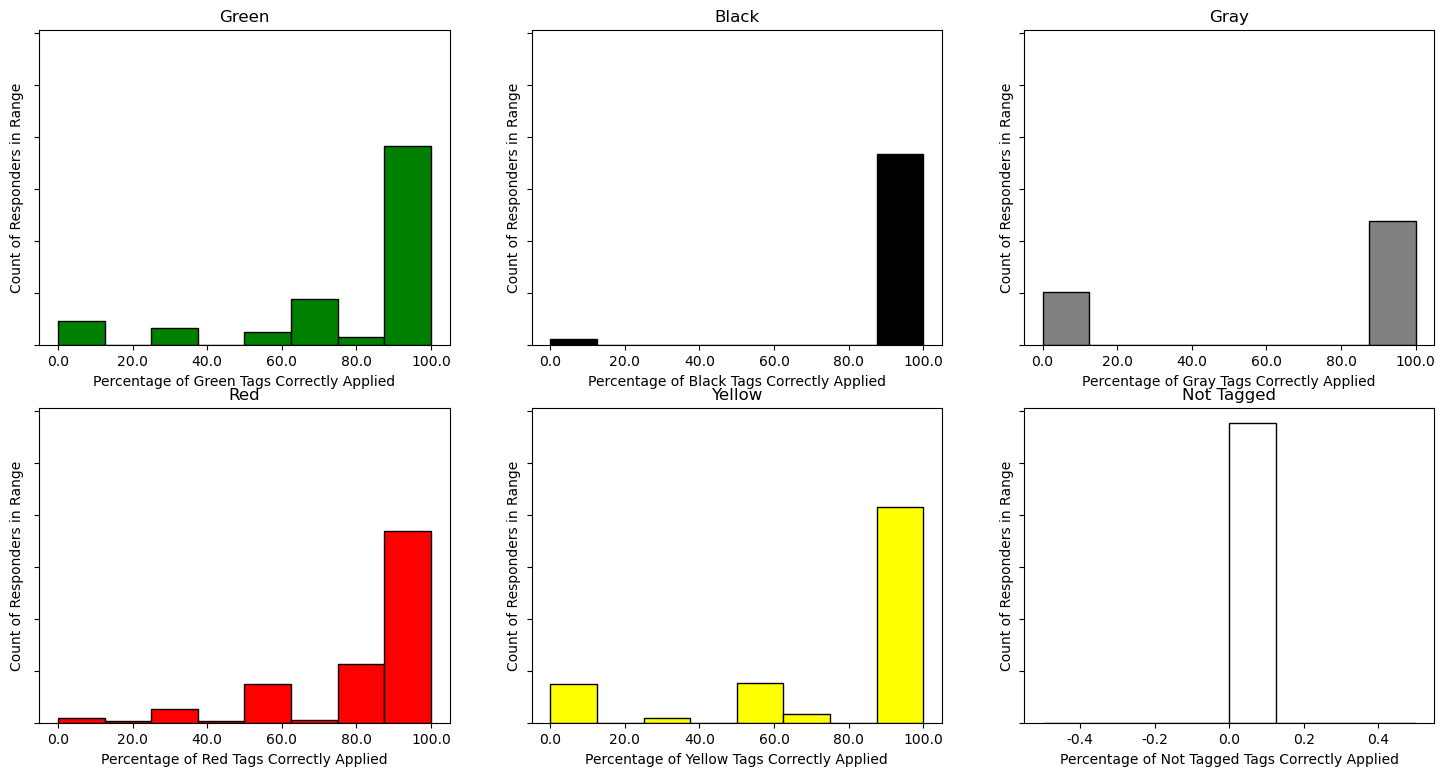

In [9]:

# Display a histogram of the percentage of tags correctly applied based on the patient record SALT, separated by tag
get_xtick_text = lambda text_obj: round(text_obj.get_position()[0], 2)
ylabel = 'Count of Responders in Range'

# Calculate the number of plots and the number of rows and columns
unique_tags = correct_count_by_tag_df.predicted_tag.unique()
num_plots = len(unique_tags)
num_rows = min(num_plots, 2)
num_cols = int(np.ceil(num_plots / num_rows))

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 9), sharex=False, sharey=True)
columns_list = [
    'correct_count', 'total_count', 'percentage_tag_correct'
]
for i, predicted_tag in enumerate(unique_tags):
    
    # Get the histogram data
    mask_series = (correct_count_by_tag_df.predicted_tag == predicted_tag)
    mask_series &= (correct_count_by_tag_df.scene_type == 'Triage') & (correct_count_by_tag_df.is_scene_aborted == False)
    xlabel = f'Percentage of {predicted_tag.title()} Tags Correctly Applied'
    color = 'white' if (predicted_tag == 'Not Tagged') else predicted_tag.lower()
    ax = nu.plot_histogram(
        correct_count_by_tag_df[mask_series], 'percentage_tag_correct', xlabel=xlabel, xtick_text_fn=get_xtick_text,
        title=predicted_tag.title(), ylabel=ylabel, xticks_are_temporal=False, ax=axs[i // num_cols, i % num_cols], color=color, bins=8
    )
    
    axs[i // num_cols, i % num_cols].grid(False)
    
    # Can you provide the following statistics for this distribution: mean, median, mode, SD, Interquartile range?
    renamed_columns_list = [
        f'correct_{predicted_tag}_tag_count', f'total_{predicted_tag}_tag_count', f'percentage_{predicted_tag}_tag_correct'
    ]
    renamed_columns_list = [cn.lower().replace(' ', '_') for cn in renamed_columns_list]
    df = correct_count_by_tag_df[mask_series][columns_list].rename(columns={k: v for k, v in zip(columns_list, renamed_columns_list)})
    display(nu.get_statistics(df, renamed_columns_list).applymap(lambda x: round(x, 2), na_action='ignore').T)

# Remove the remainder of the plots
i += 1
while i < (num_rows * num_cols):
    axs[i // num_cols, i % num_cols].remove()
    i += 1

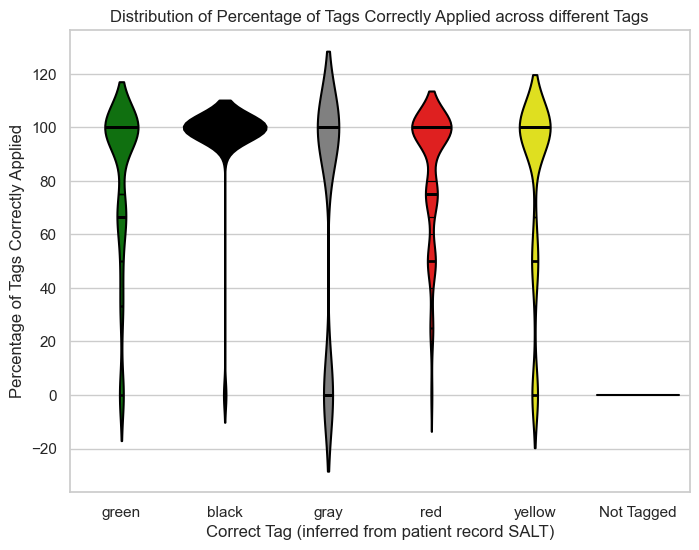

In [27]:

import seaborn as sns

# Sample data for the violin plot
data = {
    'predicted_tag': correct_count_by_tag_df.predicted_tag.tolist(),
    'percentage_tag_correct': correct_count_by_tag_df.percentage_tag_correct.tolist()
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the style of the plot
sns.set(style='whitegrid')

# Create the violin plot with 5 violins
plt.figure(figsize=(8, 6))
palette = ['white' if (color == 'Not Tagged') else color for color in unique_tags]
sns.violinplot(x='predicted_tag', y='percentage_tag_correct', data=df, palette=palette, inner='stick')

# Set plot labels and title
plt.xlabel('Correct Tag (inferred from patient record SALT)')
plt.ylabel('Percentage of Tags Correctly Applied')
plt.title('Distribution of Percentage of Tags Correctly Applied across different Tags')

# Show the plot
plt.show()


# Maintenance

In [5]:

# Create the tag-to-SALT data frame
tag_to_salt_df = fu.get_is_tag_correct_dataframe(frvrs_logs_df, groupby_column='logger_version')
nu.store_objects(tag_to_salt_df=tag_to_salt_df)
nu.save_data_frames(tag_to_salt_df=tag_to_salt_df)

Pickling to /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/tag_to_salt_df.pkl
Saving to /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/csv/tag_to_salt_df.csv
